In [24]:
import pandas as pd
df = pd.read_csv("dataset_for_datascience_assignment.csv")

#I tried to make sure that the data has loaded correctly and to evaluate column names and to see if there are any gaps.
df.head()


,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [25]:
df.info() #I'm trying to see the amount of all non-null columns and their types and names.
df.isnull().sum() #I count the amount of all null data in every column to see whether here are any null data. IF there is, I have to clean it to make sure that I will be able to visualise data correctly on graphs and to draw objective conclusions based on metrics.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      12028 non-null  float64
 9   LUNCH_PURCHASES                          12028 non-null  float64
 10  EVENING_PURCHASES                        12028

REGISTRATION_DATE                              0
REGISTRATION_COUNTRY                           0
PURCHASE_COUNT                                 0
PURCHASE_COUNT_DELIVERY                     9955
PURCHASE_COUNT_TAKEAWAY                     9955
FIRST_PURCHASE_DAY                         10019
LAST_PURCHASE_DAY                           9956
USER_ID                                        0
BREAKFAST_PURCHASES                         9955
LUNCH_PURCHASES                             9955
EVENING_PURCHASES                           9955
DINNER_PURCHASES                            9955
LATE_NIGHT_PURCHASES                        9955
TOTAL_PURCHASES_EUR                         9955
DISTINCT_PURCHASE_VENUE_COUNT               9955
MIN_PURCHASE_VALUE_EUR                      9955
MAX_PURCHASE_VALUE_EUR                      9955
AVG_PURCHASE_VALUE_EUR                      9955
PREFERRED_DEVICE                              73
IOS_PURCHASES                               9955
WEB_PURCHASES       

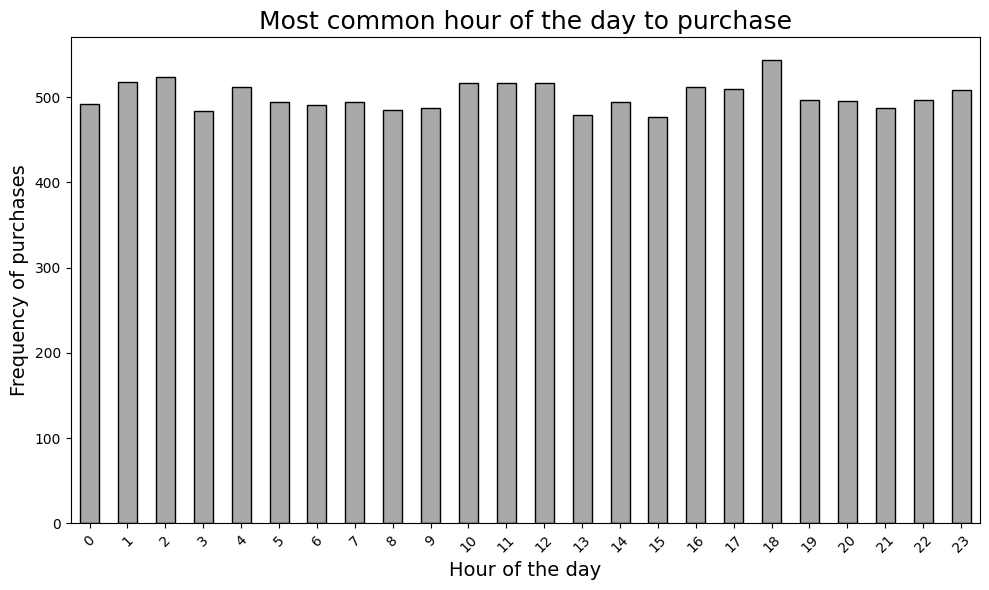

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset_for_datascience_assignment.csv")
hour_counts = df['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'].value_counts().sort_index()

#Bar chart building
plt.figure(figsize=(10, 6))
hour_counts.plot(kind='bar', color='darkgrey', edgecolor='black')
plt.title("Most common hour of the day to purchase", fontsize=18)
plt.xlabel("Hour of the day", fontsize=14)
plt.ylabel("Frequency of purchases", fontsize=14)

#Names for every hour below the bar chart
plt.xticks(range(24), [f'{i}' for i in range(24)], rotation=45)

plt.tight_layout()
plt.show()

In [27]:
total_purchases = df['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'].count()
print("The total number of purchases during the day:", total_purchases)

#just wanted to check myself by calculating the sum of all purchases and whether the scheme is correct. It's correct.

The total number of purchases during the day: 12028


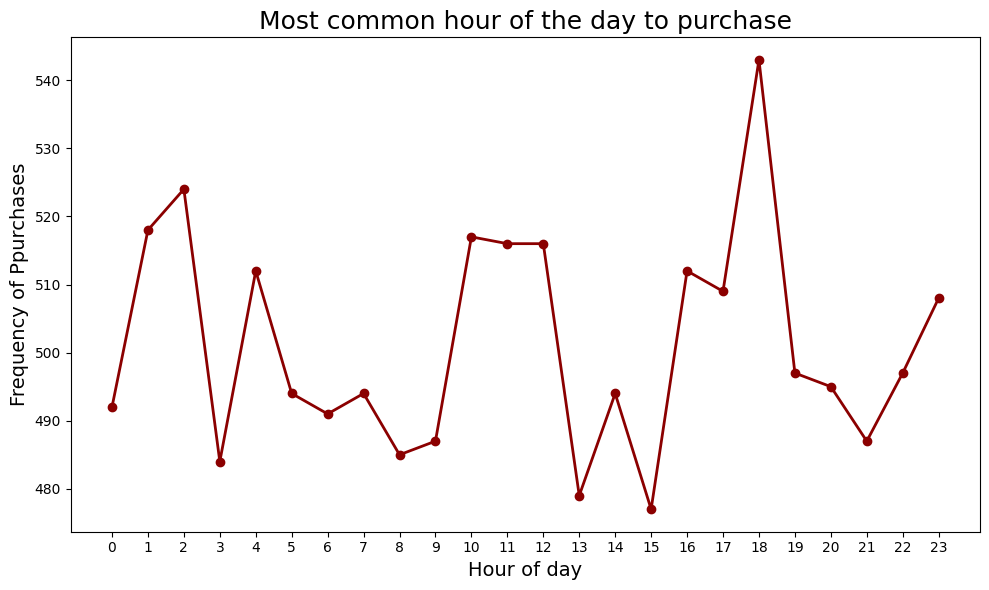

In [28]:
#I decided that bar chart doesn't look so good, so I tried to visualise the same data but as line graph this time

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset_for_datascience_assignment.csv")
purchase_count_per_hour = df['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'].value_counts().sort_index()

# Building a line graph this time
plt.figure(figsize=(10, 6))
purchase_count_per_hour.plot(kind='line', color='darkred', marker='o', lw=2)

#Names
plt.title("Most сommon hour of the day to purchase", fontsize=18)
plt.xlabel("Hour of day", fontsize=14)
plt.ylabel("Frequency of Ppurchases", fontsize=14)
plt.xticks(range(24))

#Result
plt.tight_layout()
plt.savefig("Junk_chart_1.png", dpi=300, bbox_inches="tight")
plt.show()


#PS:It actually looks much better and easier to analyse and see the difference, so I will leave this variant and will attach this one to my presentation.

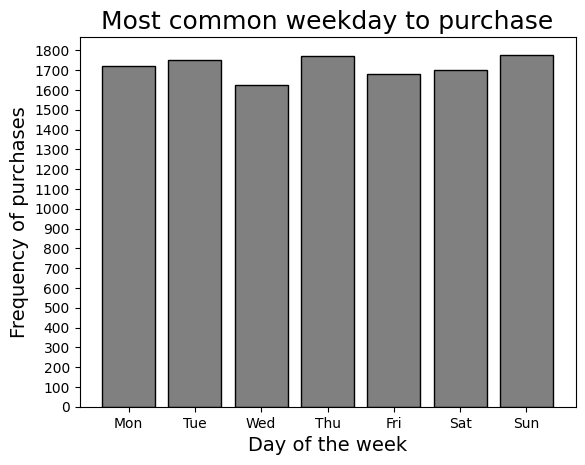

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Doing the same thing but building a bar char for most common weekday to purchase
df = pd.read_csv("dataset_for_datascience_assignment.csv")
dfplot = df['MOST_COMMON_WEEKDAY_TO_PURCHASE'].plot(kind='hist', bins=7, color='grey', edgecolor='black', rwidth=0.8)

#All names
dfplot.set_title("Most common weekday to purchase", fontsize=18)
dfplot.set_xlabel("Day of the week", fontsize=14)
dfplot.set_ylabel("Frequency of purchases", fontsize=14)

#Centralising the bars
bin_centers = [patch.get_x() + patch.get_width() / 2 for patch in dfplot.patches]

#Naming the weekdays
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks=bin_centers, labels=weekday_labels)

#Make more detailed Y axis on the left side of chart
max_y = dfplot.get_ylim()[1]
plt.yticks(np.arange(0, max_y + 1, 100))

#Result
plt.show()

[1 0 2 5 6 4 3]


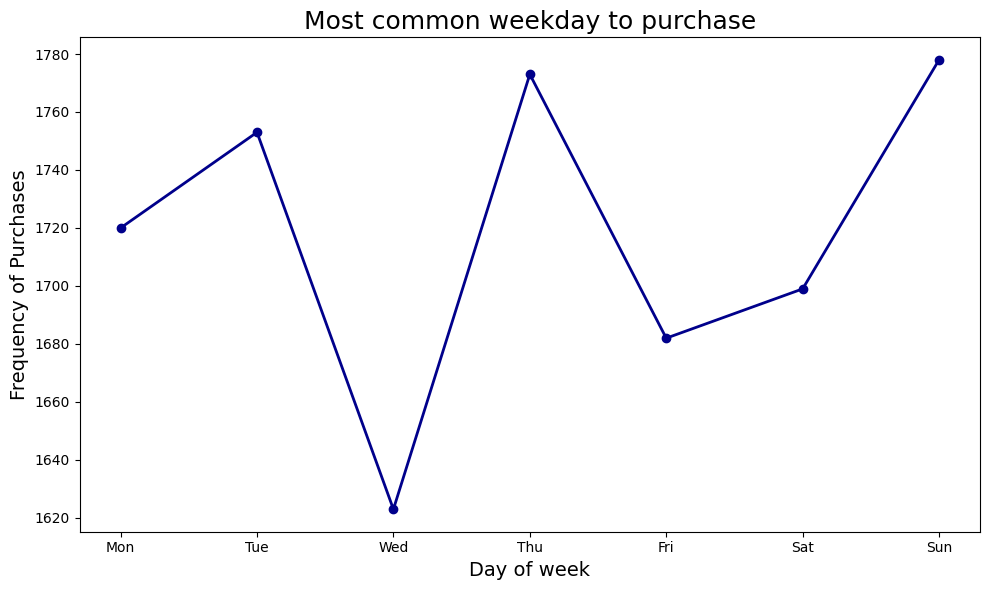

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

#After seeing on the previous example that bar chart shows all values with minumum difference, I decide to build line graph instead to visualisate data because it will be easier to follow metrics.

df = pd.read_csv("dataset_for_datascience_assignment.csv")

#I deleted the rows with null meanings here to be able to build the line graph
df = df[df['MOST_COMMON_WEEKDAY_TO_PURCHASE'].notna()]

#Turn the index value of the weekday into int type
df['MOST_COMMON_WEEKDAY_TO_PURCHASE'] = df['MOST_COMMON_WEEKDAY_TO_PURCHASE'].astype(int)

#Made sure that all indexes for every day of week are correct to build a graph
df['MOST_COMMON_WEEKDAY_TO_PURCHASE'] = df['MOST_COMMON_WEEKDAY_TO_PURCHASE'] - 1

#Now here I count how much purchases were made
print(df['MOST_COMMON_WEEKDAY_TO_PURCHASE'].unique())

#per weekday
weekday_counts = df['MOST_COMMON_WEEKDAY_TO_PURCHASE'].value_counts().reindex(range(7), fill_value=0)

#I start build the line graph
plt.figure(figsize=(10, 6))
plt.plot(weekday_counts.index, weekday_counts.values, marker='o', lw=2, color='darkblue')

weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks=range(7), labels=weekday_labels)

plt.title("Most common weekday to purchase", fontsize=18)
plt.xlabel("Day of week", fontsize=14)
plt.ylabel("Frequency of Purchases", fontsize=14)

#Result
plt.tight_layout()
plt.show()


In [31]:
import pandas as pd

df = pd.read_csv("dataset_for_datascience_assignment.csv")

#I count how much purchases is made on every day of the week. And as I made in previous graphs, I count only non-null values (unique values) because I don't need data of those customers, who didn't purchase on any day of the week anything. Shortly speaking, gaps aren't needed in this statistics, so I just sort them out and don't include.
unique_values = df['MOST_COMMON_WEEKDAY_TO_PURCHASE'].unique()
print("Unique values in 'MOST_COMMON_WEEKDAY_TO_PURCHASE':", unique_values)

#Here I start to count actual purchases per day, kinda sorting all purchases from upper into different "weekdays"
weekday_counts = df['MOST_COMMON_WEEKDAY_TO_PURCHASE'].value_counts().sort_index()
weekday_counts.index = weekday_counts.index.astype(int)
weekday_counts = weekday_counts[weekday_counts.index <= 6]

#Connect previous indexes to the weekdays since in the starter data we don't have the names but only numbers. like 1 - means first weekday aka Monday
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_counts.index = [weekday_labels[i] for i in weekday_counts.index]

#Results to check again whether data on my graph was correct. (It's correct.)
print(weekday_counts)



Unique values in 'MOST_COMMON_WEEKDAY_TO_PURCHASE': [nan  2.  1.  3.  6.  7.  5.  4.]
Tue    1720
Wed    1753
Thu    1623
Fri    1773
Sat    1682
Sun    1699
Name: count, dtype: int64


In [32]:
import pandas as pd

#Now I have to count for what time segment they purchase. Here I just quickly pull out all data from the database to see the numbers.
df = pd.read_csv("dataset_for_datascience_assignment.csv")

total_breakfasts = df['BREAKFAST_PURCHASES'].sum()
print(f"TOTAL BREAKFAST PURCHASES: {int(total_breakfasts)}")

total_lunch = df['LUNCH_PURCHASES'].sum()
print(f"TOTAL LUNCH PURCHASES: {int(total_lunch)}")

total_evening = df['EVENING_PURCHASES'].sum()
print(f"TOTAL EVENING PURCHASES: {int(total_evening)}")

total_dinner = df['DINNER_PURCHASES'].sum()
print(f"TOTAL DINNER PURCHASES: {int(total_dinner)}")

total_late_night = df['LATE_NIGHT_PURCHASES'].sum()
print(f"TOTAL LATE NIGHT PURCHASES: {int(total_late_night)}")
#I got the result here that customers don't purchase any products for late night because I have "0" as output result.

#recheck of late night purchases to make sure that all of them are 0
print(df['LATE_NIGHT_PURCHASES'].describe())
#yep, everything is correct.


TOTAL BREAKFAST PURCHASES: 2333
TOTAL LUNCH PURCHASES: 28567
TOTAL EVENING PURCHASES: 5935
TOTAL DINNER PURCHASES: 36433
TOTAL LATE NIGHT PURCHASES: 0
count    12028.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: LATE_NIGHT_PURCHASES, dtype: float64


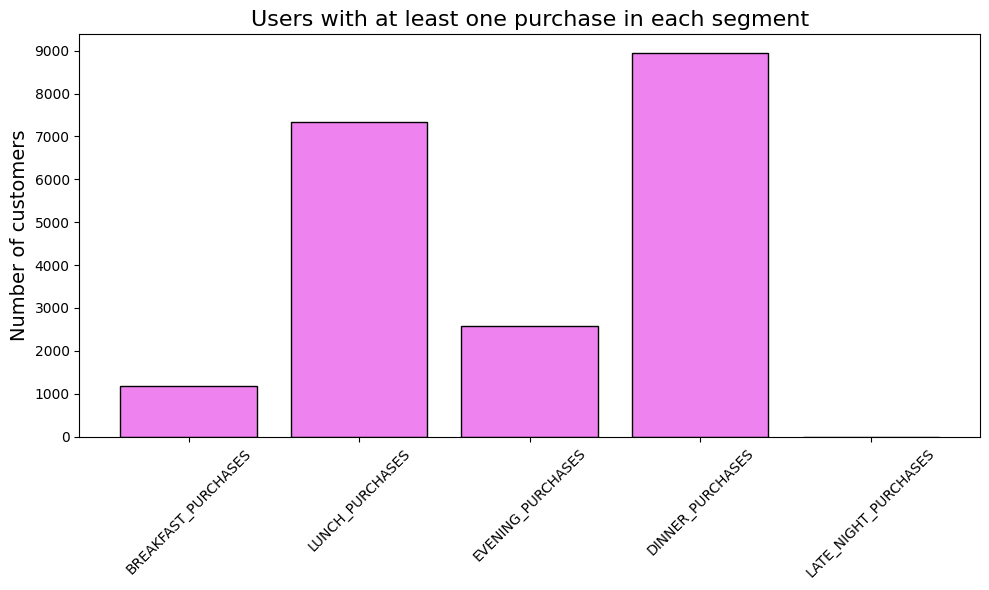

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Now I have to do the metric of preffered order time and to visualise these data.
#I start with counting users, who made at least 1 purchase (more than 0) during any of these time segments:
time_segments = ['BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES', 'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES']

user_counts = {}
for segment in time_segments:
    user_counts[segment] = (df[segment] > 0).sum()

#Bar chart making:
plt.figure(figsize=(10, 6))
plt.bar(user_counts.keys(), user_counts.values(), color='violet', edgecolor='black')
plt.title("Users with at least one purchase in each segment", fontsize=16)
plt.ylabel("Number of customers", fontsize=14)
plt.xticks(rotation=45)
max_y = max(user_counts.values())
plt.yticks(np.arange(0, max_y + 1000, 1000)) 

#Result
plt.tight_layout()
plt.show()

In [34]:
#I need to calculate convertion rate metric to see how many customers have registered and how many of them stayed to purchase at least once

total_users = df.shape[0]
users_with_orders = df[df['PURCHASE_COUNT'] > 0].shape[0] #registered customer made at least one purchase
print(f"Total registered users: {total_users:.2f}")
print(f"Total users, who made at least one purchase: {users_with_orders:.2f}")

conversion_rate = (users_with_orders / total_users) * 100 #conversion rate % and result
print(f"Conversion Rate: {conversion_rate:.2f}%")

Total registered users: 21983.00
Total users, who made at least one purchase: 12028.00
Conversion Rate: 54.72%


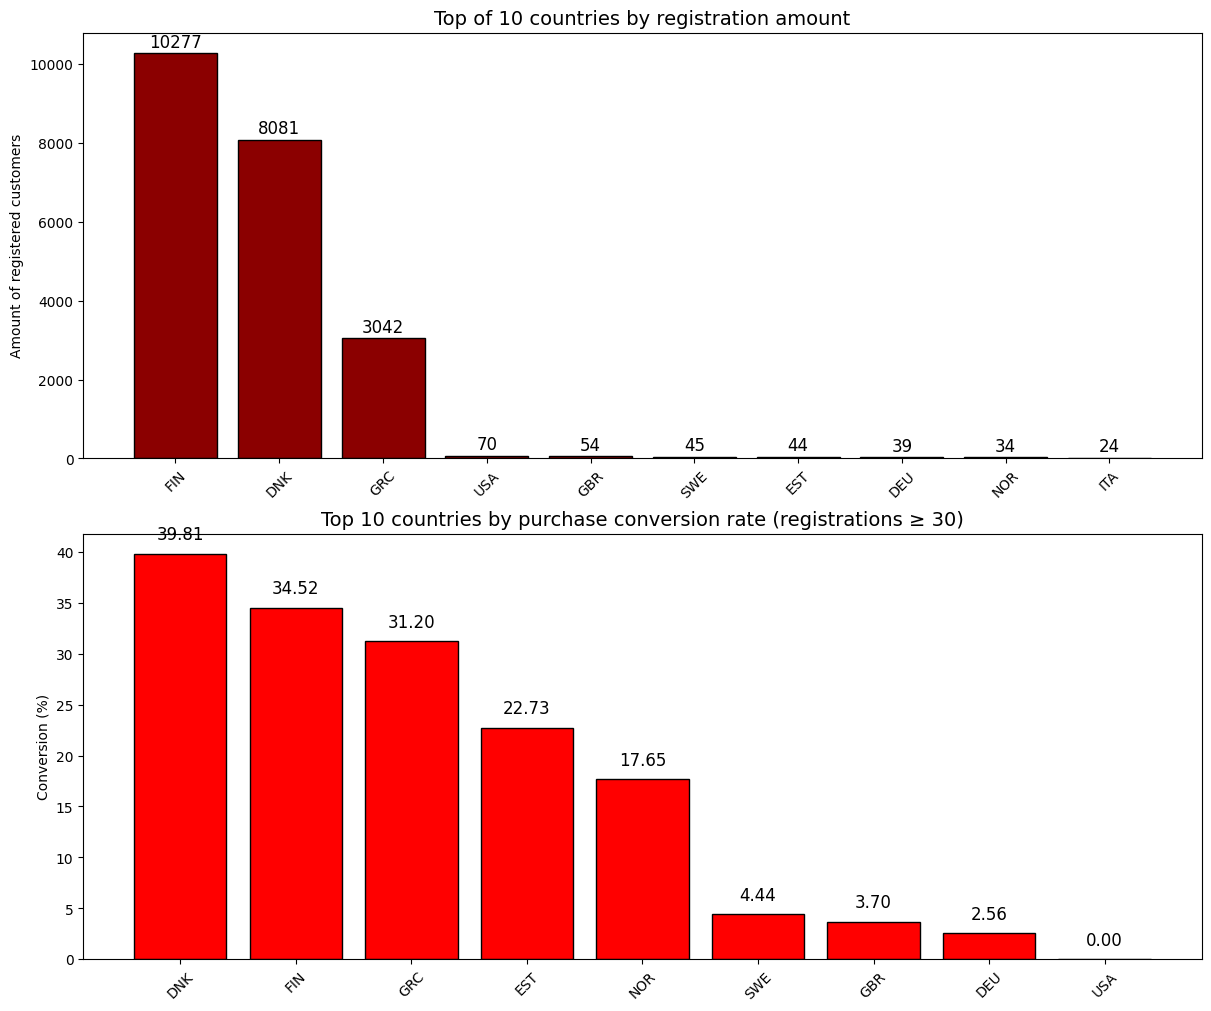

In [35]:
import pandas as pd
import matplotlib.pyplot as plt


# Make sure FIRST_PURCHASE_DAY and LAST_PURCHASE_DAY are in datetime format
df['FIRST_PURCHASE_DAY'] = pd.to_datetime(df['FIRST_PURCHASE_DAY'])
df['LAST_PURCHASE_DAY'] = pd.to_datetime(df['LAST_PURCHASE_DAY'])

#Calculations
df['DAYS_BETWEEN_PURCHASES'] = (df['LAST_PURCHASE_DAY'] - df['FIRST_PURCHASE_DAY']).dt.days
country_counts = df["REGISTRATION_COUNTRY"].value_counts()
total_users_by_country = df.groupby("REGISTRATION_COUNTRY")["USER_ID"].count()
buyers_by_country = df[df["DAYS_BETWEEN_PURCHASES"] > 0].groupby("REGISTRATION_COUNTRY")["USER_ID"].count()
conversion_df = pd.DataFrame({"total_users": total_users_by_country, "buyers": buyers_by_country})


# Fill NaN values as 0 (for countries with no buyers)
conversion_df = conversion_df.fillna(0)
#Conversion rate as %
conversion_df["conversion_rate"] = (conversion_df["buyers"] / conversion_df["total_users"] * 100).round(2)
#Size of the bar chart
fig, axs = plt.subplots(2, 1, figsize=(12, 10), constrained_layout=True)


# --- Graph 1 -- Top of 10 countries by registration amount ---
top_countries_by_users = country_counts.head(10)  # Top-10 countries by number of registrations
bars = axs[0].bar(top_countries_by_users.index, top_countries_by_users.values, color='darkred', edgecolor='black')
axs[0].set_title("Top of 10 countries by registration amount", fontsize=14)
axs[0].set_ylabel("Amount of registered customers")
axs[0].set_xticks(range(len(top_countries_by_users))) 
axs[0].set_xticklabels(top_countries_by_users.index, rotation=45)
for bar in bars:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval + 50, int(yval), ha='center', va='bottom', fontsize=12)



# --- Graph 2 -- Top of 10 countries by purchase conversion rate ---
#Counting the conversion rate % in countries with at least 30 purchases
conversion_filtered = conversion_df[conversion_df["total_users"] >= 30]
top_conversion = conversion_filtered["conversion_rate"].sort_values(ascending=False).head(10)

#Chart bar creating
bars = axs[1].bar(top_conversion.index, top_conversion.values, color='red', edgecolor='black')
axs[1].set_title("Top 10 countries by purchase conversion rate (registrations ≥ 30)", fontsize=14)
axs[1].set_ylabel("Conversion (%)")
axs[1].set_xticks(range(len(top_conversion))) 
axs[1].set_xticklabels(top_conversion.index, rotation=45)
for bar in bars:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2, yval + 1, f"{yval:.2f}", ha='center', va='bottom', fontsize=12)

plt.show()

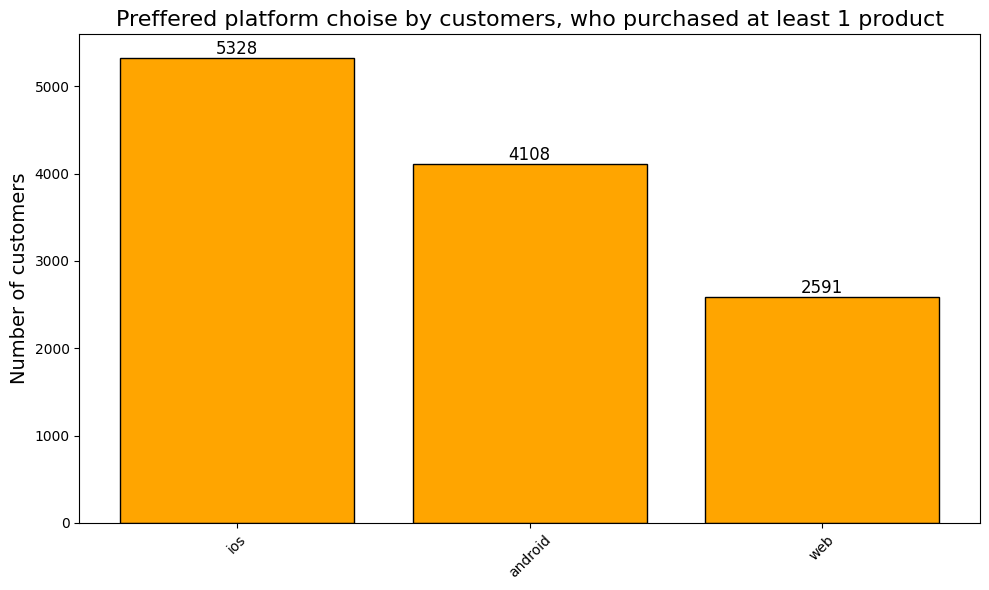

In [36]:
#building the chart for users, who made at least one purchase and their preffered device
buyers = df[df['PURCHASE_COUNT'] > 0]

#I count how many people made a purchase on each platform (device)
buyers_by_device = buyers['PREFERRED_DEVICE'].value_counts()

#building the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(buyers_by_device.index, buyers_by_device.values, color='orange', edgecolor='black')

plt.title("Preffered platform choise by customers, who purchased at least 1 product", fontsize=16)
plt.ylabel("Number of customers", fontsize=14)
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f"{yval}", ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()



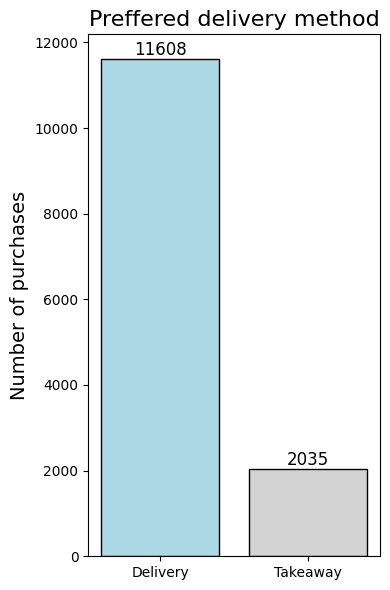

In [37]:
#preffered delivery method chart

#getting the total users per delivery method
total_users_by_delivery = df['PURCHASE_COUNT_DELIVERY'].apply(lambda x: 1 if x > 0 else 0).sum()
total_users_by_takeaway = df['PURCHASE_COUNT_TAKEAWAY'].apply(lambda x: 1 if x > 0 else 0).sum()

#the users who actually made a purchase by delivery and takeaway
buyers_by_delivery = df[df['PURCHASE_COUNT_DELIVERY'] > 0].shape[0]
buyers_by_takeaway = df[df['PURCHASE_COUNT_TAKEAWAY'] > 0].shape[0]


labels = ['Delivery', 'Takeaway']
conversion_counts = [buyers_by_delivery, buyers_by_takeaway]
plt.figure(figsize=(4,6))
bars = plt.bar(labels, conversion_counts, color=['lightblue', 'lightgrey'], edgecolor='black')
plt.title("Preffered delivery method", fontsize=16)
plt.ylabel("Number of purchases", fontsize=14)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f"{int(yval)}", ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

Global Average Purchase Value (APV): 28.82 EUR
User Average Purchase Value (APV): 31.20 EUR


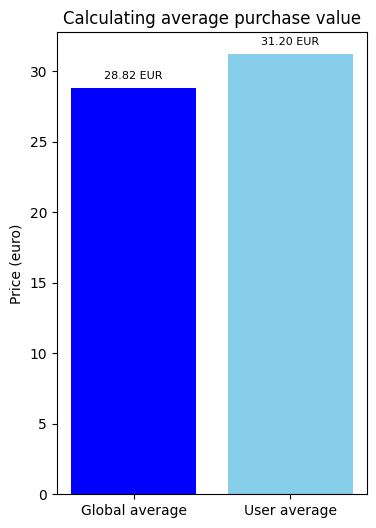

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

#Calculating the global average purchase value aka GLOBAL (APV)
total_purchase_value = df['TOTAL_PURCHASES_EUR'].sum()  # Total purchase value across all users
total_purchase_count = df['PURCHASE_COUNT'].sum()  # Total number of purchases across all users
global_avg_purchase_value = total_purchase_value / total_purchase_count
print(f"Global Average Purchase Value (APV): {global_avg_purchase_value:.2f} EUR")

#Calculating the user average purchase value aka USER (APV)
#I avoid division by zero here
user_avg_purchase_value = df[df['PURCHASE_COUNT'] > 0].groupby('USER_ID').agg(
    avg_purchase_value=('TOTAL_PURCHASES_EUR', 'sum'),  # Sum of purchases per user
    total_purchase_count=('PURCHASE_COUNT', 'sum')) # Total purchase count per user


user_avg_purchase_value['user_avg'] = user_avg_purchase_value['avg_purchase_value'] / user_avg_purchase_value['total_purchase_count']
user_avg = user_avg_purchase_value['user_avg'].mean()
print(f"User Average Purchase Value (APV): {user_avg:.2f} EUR")

#Visualisation part:
x_labels = ['Global average', 'User average']
y_values = [global_avg_purchase_value, user_avg]

# Bars creation
plt.figure(figsize=(4, 6))
bars = plt.bar(x_labels, y_values, color=['blue', 'skyblue'])
plt.title('Calculating average purchase value')
plt.ylabel('Price (euro)')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.2f} EUR', 
             ha='center', va='bottom', fontsize=8)
plt.savefig("Junk_chart_2.png", dpi=300, bbox_inches="tight")
plt.show()

In [39]:
#the average distance for delivery in km
avg_delivery_distance = df['AVERAGE_DELIVERY_DISTANCE_KMS'].mean()
print(f"Average delivery distance: {avg_delivery_distance:.2f} km")

Average delivery distance: 5.96 km


In [40]:
import pandas as pd

df_cleaned = df.dropna(subset=['AVG_PURCHASE_VALUE_EUR'])

#Mean
mean_purchase_value = df_cleaned['AVG_PURCHASE_VALUE_EUR'].mean()

#Median
median_purchase_value = df_cleaned['AVG_PURCHASE_VALUE_EUR'].median()

#Mode
mode_purchase_value = df_cleaned['AVG_PURCHASE_VALUE_EUR'].mode()[0]  # [0], потому что mode() возвращает серию

#Min and max
min_purchase_value = df_cleaned['AVG_PURCHASE_VALUE_EUR'].min()
max_purchase_value = df_cleaned['AVG_PURCHASE_VALUE_EUR'].max()

std_purchase_value = df_cleaned['AVG_PURCHASE_VALUE_EUR'].std()

#Results
print(f"Mean Purchase Value (APV): {mean_purchase_value:.2f} EUR")
print(f"Median Purchase Value (APV): {median_purchase_value:.2f} EUR")
print(f"Mode Purchase Value (APV): {mode_purchase_value:.2f} EUR")
print(f"Min Purchase Value (APV): {min_purchase_value:.2f} EUR")
print(f"Max Purchase Value (APV): {max_purchase_value:.2f} EUR")
print(f"Standard Deviation of Purchase Value (APV): {std_purchase_value:.2f} EUR")

Mean Purchase Value (APV): 31.20 EUR
Median Purchase Value (APV): 27.32 EUR
Mode Purchase Value (APV): 25.30 EUR
Min Purchase Value (APV): 1.01 EUR
Max Purchase Value (APV): 657.80 EUR
Standard Deviation of Purchase Value (APV): 20.72 EUR


Mean Purchase Value (APV): 31.20 EUR
Median Purchase Value (APV): 27.32 EUR
Mode Purchase Value (APV): 25.30 EUR
Min Purchase Value (APV): 1.01 EUR
Max Purchase Value (APV): 657.80 EUR
Standard Deviation of Purchase Value (APV): 20.72 EUR


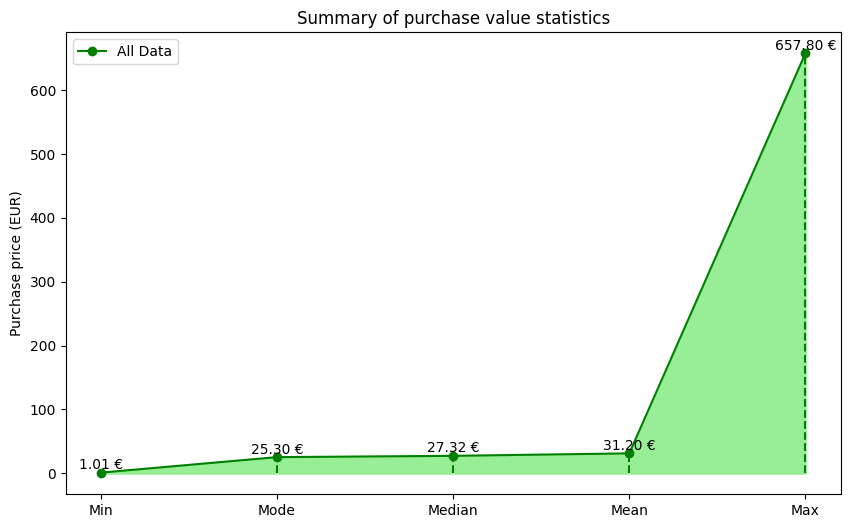

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

#Calculating statistics for all data
mean_purchase_value = df['AVG_PURCHASE_VALUE_EUR'].mean()
median_purchase_value = df['AVG_PURCHASE_VALUE_EUR'].median()
mode_purchase_value = df['AVG_PURCHASE_VALUE_EUR'].mode()[0]
min_purchase_value = df['AVG_PURCHASE_VALUE_EUR'].min()
max_purchase_value = df['AVG_PURCHASE_VALUE_EUR'].max()

#Output statistics before building the schedule
print(f"Mean Purchase Value (APV): {mean_purchase_value:.2f} EUR")
print(f"Median Purchase Value (APV): {median_purchase_value:.2f} EUR")
print(f"Mode Purchase Value (APV): {mode_purchase_value:.2f} EUR")
print(f"Min Purchase Value (APV): {min_purchase_value:.2f} EUR")
print(f"Max Purchase Value (APV): {max_purchase_value:.2f} EUR")
print(f"Standard Deviation of Purchase Value (APV): {std_purchase_value:.2f} EUR")

#The list of statistics values and their names
stats_values = [
    ('Mean', mean_purchase_value),
    ('Median', median_purchase_value),
    ('Mode', mode_purchase_value),
    ('Min', min_purchase_value),
    ('Max', max_purchase_value)
]

#Sorting the statistics by value to make the line graph look more naturally rising up from left to right later
stats_values_sorted = sorted(stats_values, key=lambda x: x[1])

#Split data into 2 sorted lists by labels and values
labels_sorted = [x[0] for x in stats_values_sorted]
values_sorted = [x[1] for x in stats_values_sorted]

#Start building a line graph from here
plt.figure(figsize=(10, 6))
plt.plot(labels_sorted, values_sorted, marker='o', label='All Data', color='green')

#Add point labels on the line graph itself
for i, v in enumerate(values_sorted):
    plt.text(i, v + 1, f'{v:.2f} €', ha='center', va='bottom', fontsize=10)
    #Making the line graph to look not so blank by working on it's design a little bit, so I add a vertical line at each point (going from the point down to the X axis) coming from here
    plt.vlines(i, 0, v, colors='green', linestyles='dashed')
    #Filling the area under the "all data" line with a color. Now it will look pretty
    plt.fill_between(range(len(values_sorted)), values_sorted, color='lightgreen', alpha=0.4)

#Giving the names
plt.title('Summary of purchase value statistics')
plt.ylabel('Purchase price (EUR)')

#Add a legend to explain previously putted points. aka just to give the number of euros to every "point" on the line graph. 
plt.legend()

plt.show()

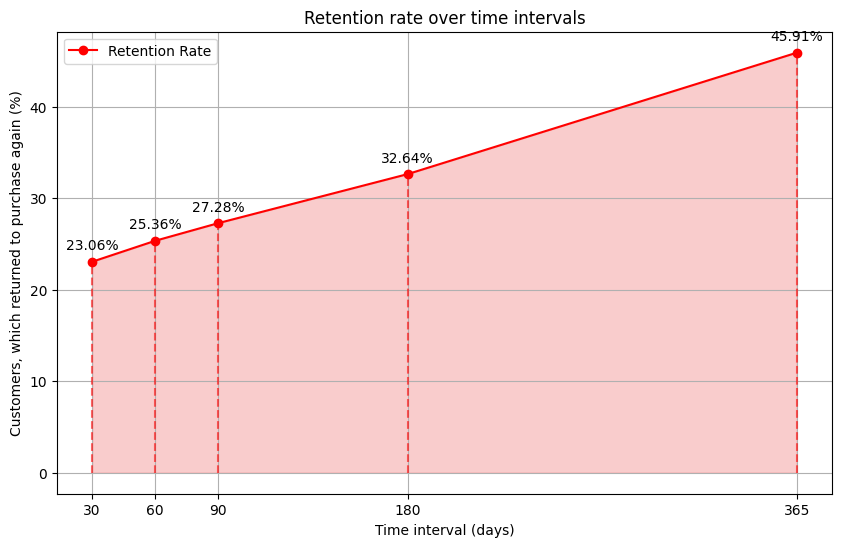

Retention Rate for 30 days: 23.06%
Retention Rate for 60 days: 25.36%
Retention Rate for 90 days: 27.28%
Retention Rate for 180 days: 32.64%
Retention Rate for 365 days: 45.91%


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

#Converting dates to datetime format below:
df['FIRST_PURCHASE_DAY'] = pd.to_datetime(df['FIRST_PURCHASE_DAY'])
df['LAST_PURCHASE_DAY'] = pd.to_datetime(df['LAST_PURCHASE_DAY'])

#Calculating the total number of days between the first and last purchase
df['DAYS_BETWEEN_PURCHASES'] = (df['LAST_PURCHASE_DAY'] - df['FIRST_PURCHASE_DAY']).dt.days

#Calculating the retention rate for different time intervals (I have been browsing and found that usually time intervals for RR are 30, 60, 90, 180 days or 1 year, so I used them)
time_intervals = [30, 60, 90, 180, 365]
retention_rates = []

for interval in time_intervals:
    #Users who returned within the `interval` days or less
    retained_users = df[df['DAYS_BETWEEN_PURCHASES'] <= interval].shape[0]
    
    #Total number of users who made a purchase
    total_users = df.shape[0]
    
    #Calculate RR as %
    retention_rate = (retained_users / total_users) * 100
    retention_rates.append(retention_rate)

#Start building the line graph here
plt.figure(figsize=(10, 6))
plt.plot(time_intervals, retention_rates, marker='o', color='r', label='Retention Rate')
plt.fill_between(time_intervals, retention_rates, color='lightcoral', alpha=0.4)
for i, v in enumerate(retention_rates):
    plt.vlines(time_intervals[i], 0, v, colors='r', linestyles='dashed', alpha=0.6)
    plt.text(time_intervals[i], v + 1, f'{v:.2f}%', ha='center', va='bottom', color='black', fontsize=10)
plt.title('Retention rate over time intervals')
plt.xlabel('Time interval (days)')
plt.ylabel('Customers, which returned to purchase again (%)')
plt.xticks(time_intervals)  # Label the x-axis with the intervals
plt.grid(True)
plt.legend()
plt.savefig("Junk_chart_3.png", dpi=300, bbox_inches="tight")
plt.show()

#Results
for interval, rate in zip(time_intervals, retention_rates):
    print(f"Retention Rate for {interval} days: {rate:.2f}%")